In [2]:
 ! pip install -q kaggle  

In [1]:
from google.colab import files
files.upload()     

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadwaqargul","key":"e9732f2f369ed857d9e98200fb5eaafc"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle competitions download -c 'dogs-vs-cats'

 97% 262M/271M [00:05<00:00, 72.9MB/s]
100% 271M/271M [00:06<00:00, 46.4MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 136MB/s]
 98% 530M/543M [00:04<00:00, 158MB/s]
100% 543M/543M [00:04<00:00, 127MB/s]


In [4]:
!pip install streamlit

     |████████████████████████████████| 8.3 MB 10.0 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 180 kB 55.4 MB/s 
     |████████████████████████████████| 111 kB 46.5 MB/s 
     |████████████████████████████████| 4.3 MB 35.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 124 kB 53.9 MB/s 
     |████████████████████████████████| 788 kB 45.3 MB/s 
     |████████████████████████████████| 370 kB 49.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=a6da7b3cfba1475df7c6d2d8ab4645429b9d43044a9b5c0d10ed6f74ba2b5c43
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attemptin

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.applications.vgg16 import VGG16
import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras import layers,models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import streamlit as st
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [3]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
import os
train_first=os.path.join('/content','train-first')
os.mkdir(train_first)
train=os.path.join(train_first,'train')
os.mkdir(train)
train_cat=os.path.join(train,'cat')
os.mkdir(train_cat)
train_dog=os.path.join(train,'dog')
os.mkdir(train_dog)

In [5]:
valid_first=os.path.join('/content','valid-first')
os.mkdir(valid_first)
train=os.path.join(valid_first,'validation')
os.mkdir(train)
valid_cat=os.path.join(train,'cat')
os.mkdir(valid_cat)
valid_dog=os.path.join(train,'dog')
os.mkdir(valid_dog)

In [6]:
test_first=os.path.join('/content','test-first')
os.mkdir(test_first)
test=os.path.join(test_first,'test')
os.mkdir(test)


In [7]:
fnames=[f'cat.{i}.jpg' for i in range(1,1000)]
for fname in fnames:
    train=os.path.join('/content/train',fname)
    train_cat=os.path.join('/content/train-first/train/cat')
    shutil.copy(train,train_cat)
    

In [8]:
fnames=[f'dog.{i}.jpg' for i in range(1,1000)]
for fname in fnames:
    train=os.path.join('/content/train',fname)
    train_dog=os.path.join('/content/train-first/train/dog')
    shutil.copy(train,train_dog)
    

In [9]:
fnames=[f'cat.{i}.jpg' for i in range(10000,12000)]
for fname in fnames:
    valid=os.path.join('/content/train',fname)
    valid_cat=os.path.join('/content/valid-first/validation/cat')
    shutil.copy(valid,valid_cat)
    

In [10]:
fnames=[f'dog.{i}.jpg' for i in range(10000,12000)]
for fname in fnames:
    valid=os.path.join('/content/train',fname)
    valid_dog=os.path.join('/content/valid-first/validation/dog')
    shutil.copy(valid,valid_dog)
    

In [11]:
fnames=[f'{i}.jpg' for i in range(1,12500)]
for fname in fnames:
    test=os.path.join('/content/test1',fname)
    test1=os.path.join('/content/test-first/test')
    shutil.copy(test,test1)
    

In [12]:
vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
model=models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


2021-10-04 09:07:08.064631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 09:07:08.541773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 09:07:08.542711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 09:07:08.545110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-04 09:07:08.545943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 1s 0us/step


In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=0.2,
                             fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
train_gen=train_datagen.flow_from_directory(
    '/content/train-first/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1998 images belonging to 2 classes.


In [15]:
valid_gen=valid_datagen.flow_from_directory(
    '/content/valid-first/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [16]:
test_gen=test_datagen.flow_from_directory(
    '/content/test-first',
    target_size=(150,150),
    batch_size=1,
    class_mode=None

)

Found 12499 images belonging to 1 classes.


In [17]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['acc'])

In [18]:
model.fit(train_gen,epochs=10,steps_per_epoch=1998//20,validation_data=valid_gen,validation_steps=4000//20)

2021-10-04 09:07:16.453922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-10-04 09:07:19.475338: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


99/99 [==============================] - 102s 649ms/step - loss: 0.7189 - acc: 0.5551 - val_loss: 0.6126 - val_acc: 0.6585
Epoch 2/10
99/99 [==============================] - 59s 597ms/step - loss: 0.5733 - acc: 0.7058 - val_loss: 0.3790 - val_acc: 0.8340
Epoch 3/10
99/99 [==============================] - 59s 596ms/step - loss: 0.4395 - acc: 0.7973 - val_loss: 0.2759 - val_acc: 0.8780
Epoch 4/10
99/99 [==============================] - 59s 595ms/step - loss: 0.3077 - acc: 0.8721 - val_loss: 0.5376 - val_acc: 0.7190
Epoch 5/10
99/99 [==============================] - 59s 595ms/step - loss: 0.2383 - acc: 0.8933 - val_loss: 0.1732 - val_acc: 0.9295
Epoch 6/10
99/99 [==============================] - 59s 594ms/step - loss: 0.1919 - acc: 0.9211 - val_loss: 0.2013 - val_acc: 0.9183
Epoch 7/10
99/99 [==============================] - 59s 595ms/step - loss: 0.2002 - acc: 0.9090 - val_loss: 0.3215 - val_acc: 0.8880
Epoch 8/10
99/99 [==============================] - 59s 594ms/step - loss: 0.16

In [19]:
train_gen.class_indices

{'cat': 0, 'dog': 1}

In [20]:
y=model.predict(test_gen)
y=np.where(y>0.5,1,0)

In [21]:
model.predict(test_gen[3])

array([[0.99998105]], dtype=float32)

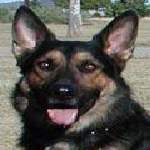

In [22]:
array_to_img(test_gen[3][0])

In [23]:
model.save('cat-vs-dog.h5')